# Feature Selection Techniques - Pearson correlation

Source of data: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

data source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
df = pd.read_csv ('/home/wojciech/Pulpit/6/Breast_Cancer_Wisconsin.csv')
green(df.shape)
df.head(3)


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


### Deleting unneeded columns

In [4]:
del df['Unnamed: 32']
del df['diagnosis']
del df['id']

In [5]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

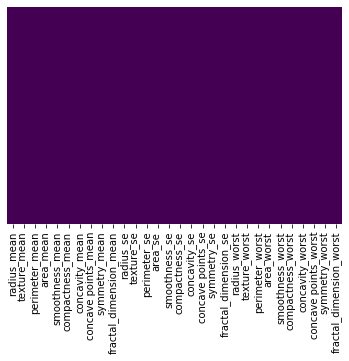

In [6]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Deletes duplicates
there were no duplicates

In [7]:
green(df.shape)
df.drop_duplicates(keep='first', inplace=True)
blue(df.shape)

(569, 30)
(569, 30)


In [8]:
blue(df.dtypes)

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [9]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### We choose the continuous variable - compactness_mean


max: 0.3454
min: 0.01938


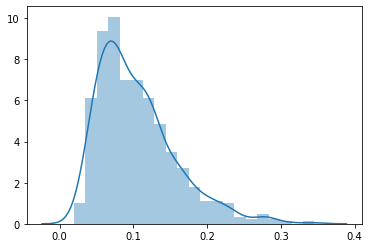

In [10]:
print('max:',df['compactness_mean'].max())
print('min:',df['compactness_mean'].min())

sns.distplot(np.array(df['compactness_mean']))

# Pearson correlation

In [11]:
def matrix_plot(df,title):

    sns.set(style="ticks")

    corr = df.corr()
    corr = np.round(corr, decimals=2)


    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(20, 20))
    #cmap = sns.diverging_palette(580, 10, as_cmap=True)
    cmap = sns.diverging_palette(180, 90, as_cmap=True) #Inna paleta barw

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0.03,annot=True,
                square=True, linewidths=.9, cbar_kws={"shrink": 0.8})
    plt.xticks(rotation=90)
    plt.title(title,fontsize=32,color='#0c343d',alpha=0.5)
    plt.show

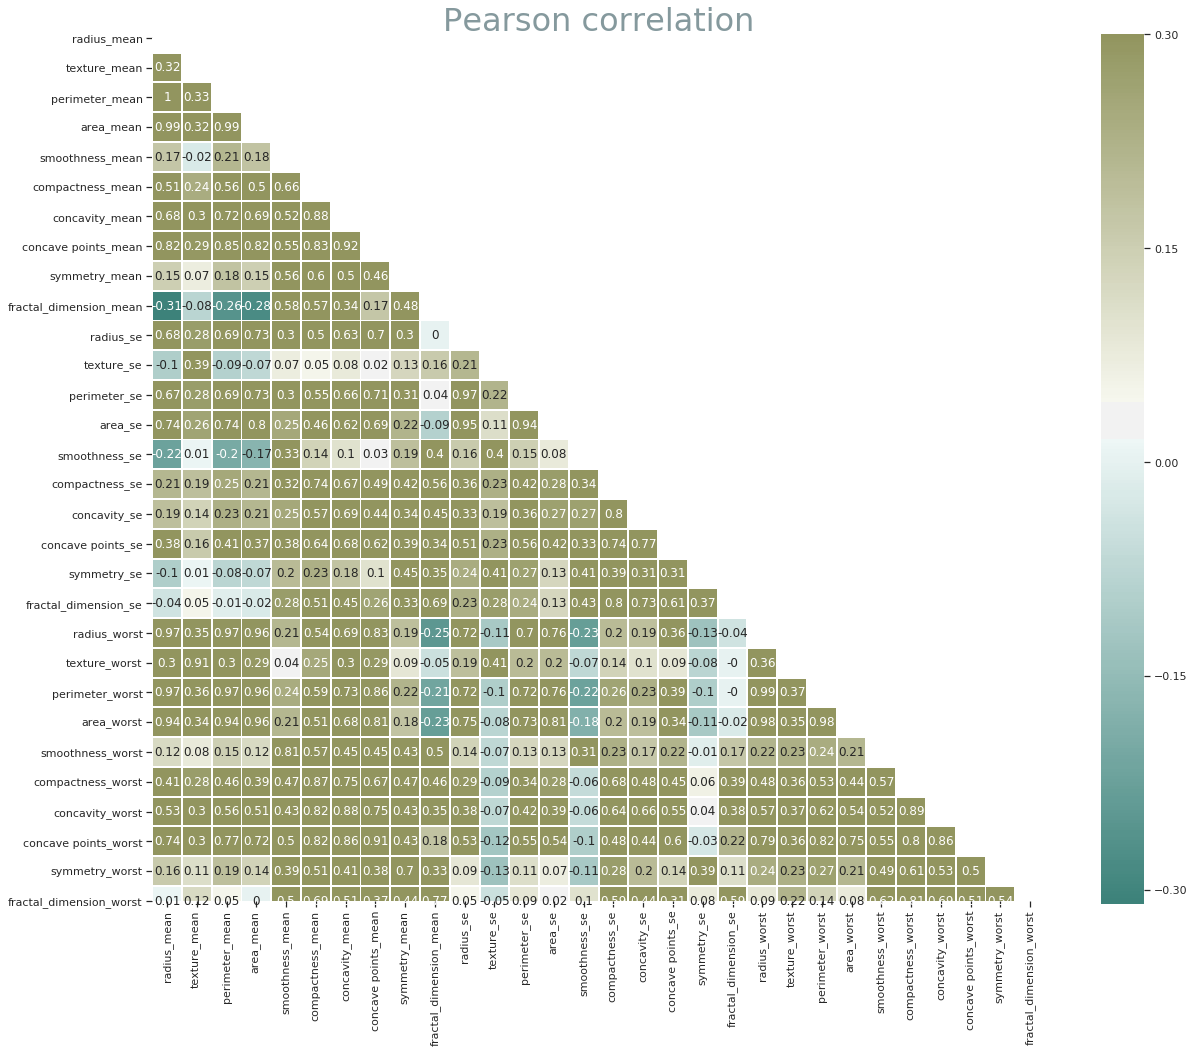

In [12]:
matrix_plot(df,'Pearson correlation')

### Correlation to the result variable

Text(0, 0.5, 'Continuous independent variables')

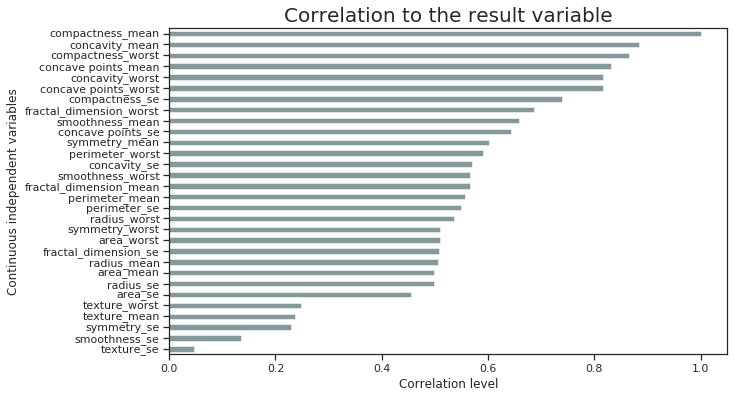

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
CORREL = df.corr().sort_values('compactness_mean')
CORREL['compactness_mean'].plot(kind='barh',color='#0c343d',alpha=0.5)
plt.title('Correlation to the result variable', fontsize=20)
plt.xlabel('Correlation level')
plt.ylabel('Continuous independent variables')

### I find variables that are highly correlated with the result variable

In [14]:
kot = abs(CORREL['compactness_mean'])
FAT = kot[kot>=0.7]
FAT

compactness_se          0.738722
concave points_worst    0.815573
concavity_worst         0.816275
concave points_mean     0.831135
compactness_worst       0.865809
concavity_mean          0.883121
compactness_mean        1.000000
Name: compactness_mean, dtype: float64

### Compares variables in pairs

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

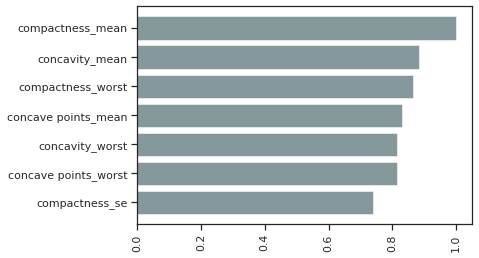

In [15]:
plt.barh(*zip(*FAT.items()),color='#0c343d',alpha=0.5) 
plt.xticks(rotation=90)

### High autocorrelation chart

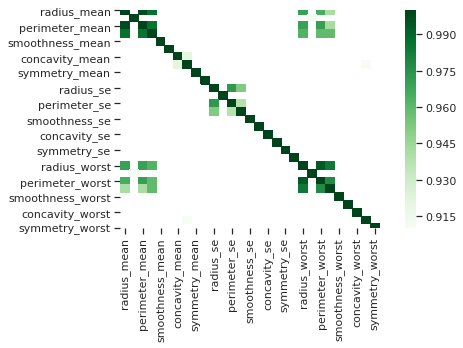

In [16]:
CORR = df.corr()

kot = CORR[CORR>=.9]
plt.figure(figsize=(6,4))
sns.heatmap(kot, cmap="Greens")

## Deleting correlated independent variables
The code we compare the correlation between variables and remove one of two features whose correlation is higher than 0.9

In [17]:
corr = df.corr()
kot = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if kot[j]:
                kot[j] = False
selected_columns = df.columns[kot]
df2 = df[selected_columns]

In [18]:
kot   #<== PĘTLA ZROBIŁA NAM wektor 31 elementów True- False

array([ True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True])

### Dimensions have been reduced

In [19]:
blue(df.shape)
green(df2.shape)

(569, 30)
(569, 20)


### OLS linear regression model for variables before reduction

In [20]:
blue(df.shape)
green(df2.shape)

(569, 30)
(569, 20)


In [21]:
X1 = df.drop('compactness_mean', axis=1) 
y1 = df['compactness_mean']  

In [22]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y1, sm.add_constant(X1))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())

R2: 0.980200


### OLS linear regression model for variables after reduction

In [23]:
X2 = df2.drop('compactness_mean', axis=1) 
y2 = df2['compactness_mean']  

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y2, sm.add_constant(X2))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
red('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.965952
The reduction of dimensions caused the deterioration of the models properties


## Eliminates variables previously selected in the FAT procedure

In [25]:
FAT

compactness_se          0.738722
concave points_worst    0.815573
concavity_worst         0.816275
concave points_mean     0.831135
compactness_worst       0.865809
concavity_mean          0.883121
compactness_mean        1.000000
Name: compactness_mean, dtype: float64

In [26]:
df3 = df.drop(['compactness_se','concave points_worst','concavity_worst','concave points_mean','compactness_worst','concavity_mean'],1)

In [27]:
X3 = df3.drop('compactness_mean', axis=1) 
y3 = df3['compactness_mean']  

In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y3, sm.add_constant(X3))
model_fit = model.fit()

print('R2: %.6f' % model_fit.rsquared)
#blue(model_fit.summary())
red('The reduction of dimensions caused the deterioration of the models properties')

R2: 0.962911
The reduction of dimensions caused the deterioration of the models properties
